Optimizing hospital procedures - predicting medical costs based on patient data
===
---

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# header
%matplotlib inline
sns.set_theme()

data_path='data/'

---
# Executive summary

**Introduction / approach / limitations.**

---
# Input data and transformations

We use a dataset containing medical costs based on patient data from Kaggle ([link](https://www.kaggle.com/datasets/mirichoi0218/insurance)). Kaggle provides a very intuitive overview of the data columns, so we do not repeat it here.

In [2]:
# load the dataset
df = pd.read_csv(data_path+"insurance.csv")

We inspect the dataset.

In [3]:
# quick view (data types / missing values / duplicates)

print(df.info())
print(df.sample(10))
print("\n")

# check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
print("\n")

# check for missing
print(df.isnull().sum())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
      age     sex     bmi  children smoker     region      charges
173    35  female  34.800         1     no  southwest   5246.04700
279    51  female  21.560         1     no  southeast   9855.13140
1022   47    male  36.080         1    yes  southeast  42211.13820
583    32  female  23.650         1     no  southeast  17626.23951
866    18    male  37.290         0     no  southeast   1141.44510
244    63  female  27.740         0    yes  northeast  29523.16560
298   

The dataset is well cleaned and the data does not require further transformations. In particular, it does not contain missing values.

We remove a single duplicated entry.

We investigate individual features below in the 'Exploratory data analysis' section, to check for unexpected values and consider encoding of the categorical data.

In [4]:
# remove duplicated entries
df.drop_duplicates(inplace=True)

print(df.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None




---
# Exploratory data analysis

We perform exploratory data analysis to inspect individual features and find candidates for model training.

In [5]:
# candidates for features used to train the model
features_candidates = df.columns.tolist() # ! start with all features
df = df[features_candidates]

# determine target variable
target_column = "charges"

# check dataset
print(df.info())
print("\n")

# separate features into numerical and categorical ones
numerical_candidates = df.select_dtypes(include=['number']).columns.tolist()
categorical_candidates = df.select_dtypes(include=['object']).columns.tolist()


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None




Inspect individual features.

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


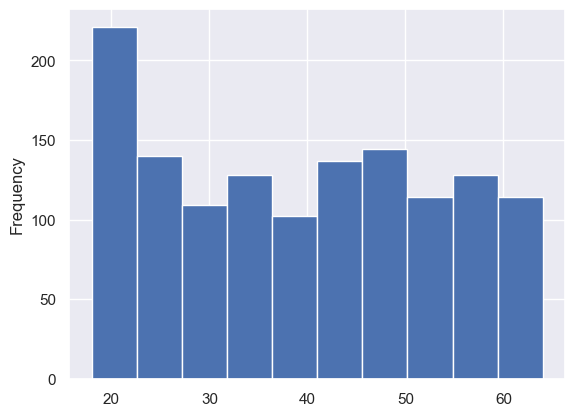

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


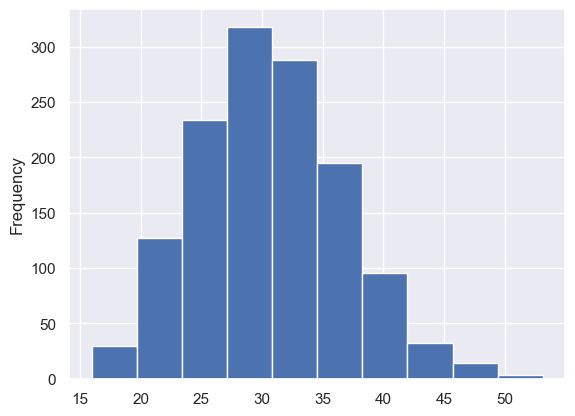

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


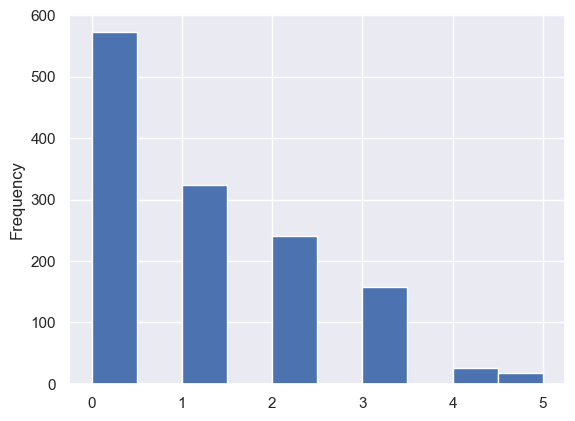

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


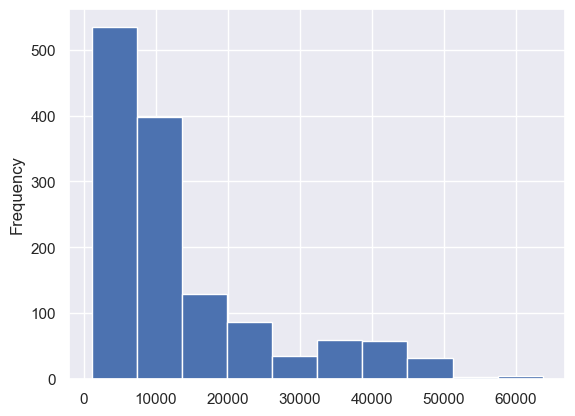

count     1337
unique       2
top       male
freq       675
Name: sex, dtype: object


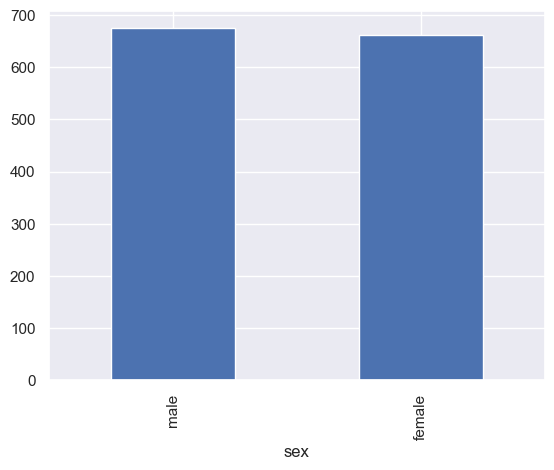

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object


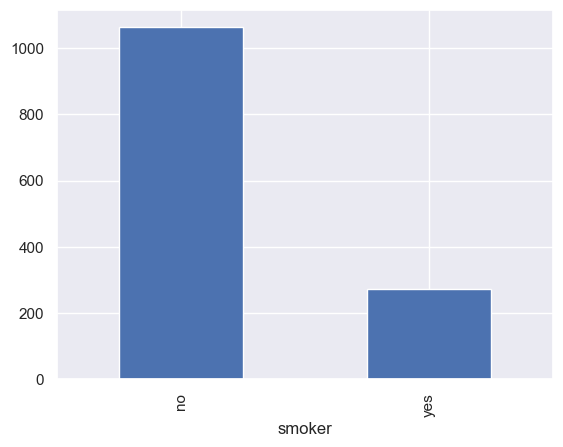

count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object


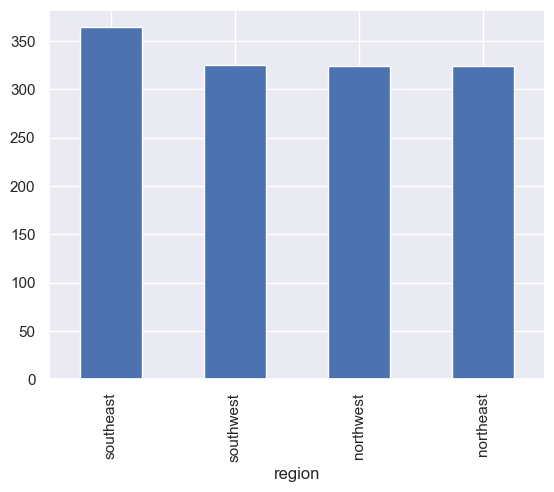

In [6]:
# get basic characteristics

for numerical in numerical_candidates:
    print(df[numerical].describe())

    df[numerical].plot.hist()
    plt.show()

for categorical in categorical_candidates:
    print(df[categorical].describe())
   
    df[categorical].value_counts().plot(kind='bar')
    plt.show()
    # print(df[categorical].value_counts(dropna=False))

We do not observe any unexpected values in the univariate distributions. The inspected features are ready for EDA.

The target variable distribution (`charges`) is highly skewed. It means that the dataset is unbalanced and potentially affected by outliers, which can affect the model training and performance.

We may experiment with output transformations later to mitigate this problem.

Next, we explore relations between the features.

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None
           age   bmi  children  charges
age       1.00  0.11      0.04     0.30
bmi       0.11  1.00      0.01     0.20
children  0.04  0.01      1.00     0.07
charges   0.30  0.20      0.07     1.00


c:\Users\malec\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


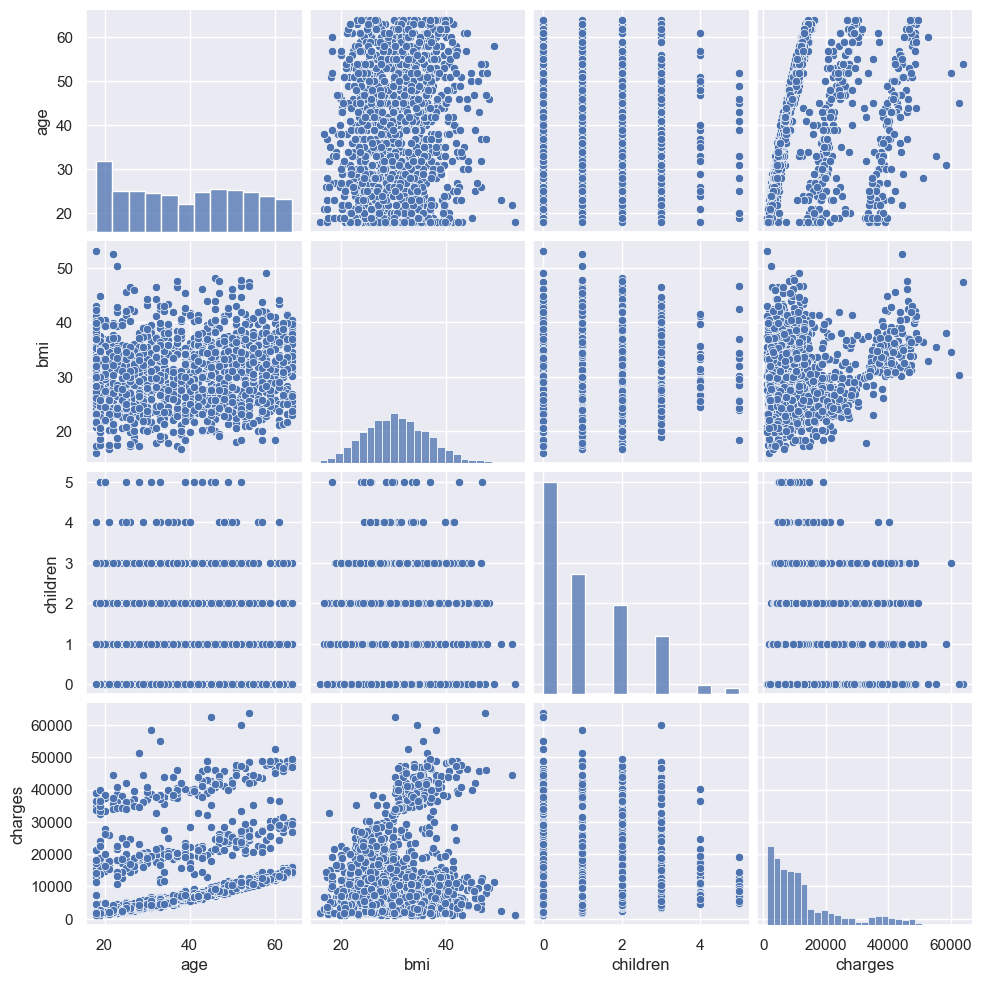

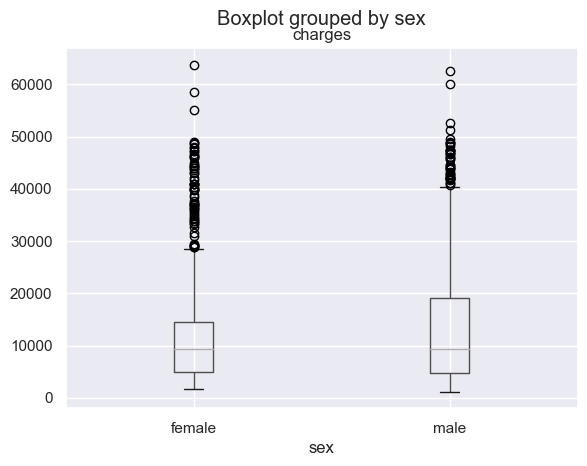

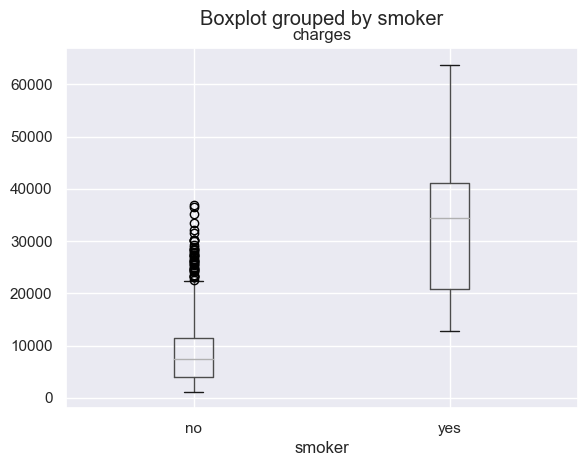

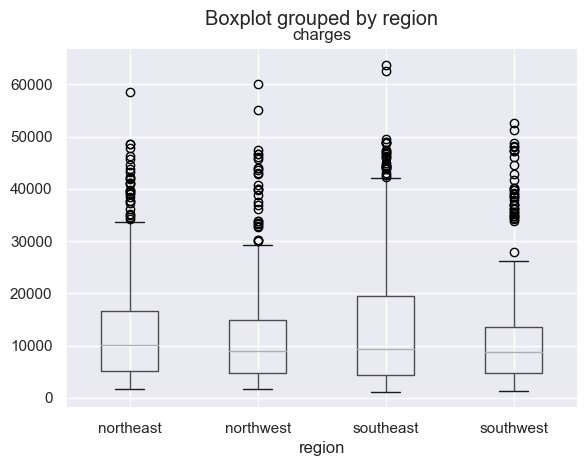

In [7]:
# check correlations
print(df.info())

# Pearson coefficient
# ! only for numerical columns
correlations = df[numerical_candidates].corr()
print(correlations.round(2))
# sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()

# scatter plots
# ! only for numerical columns
sns.pairplot(data=df[numerical_candidates])
# sns.scatterplot(data=df[numerical_candidates], x="x", y="y")
plt.show()

# ! only for categorical columns
for categorical in categorical_candidates:
    # boxplots (target distributions VS categories)
    df.boxplot(column = [target_column], by = categorical)
    plt.show()

    # barplots (avg / simpler visualization)
    # sns.barplot(data=df, x=categorical, y=target_column)
    # plt.xticks(rotation=90)
    # plt.show()

# ? all columns (detailed distributions / simpler: boxplots)
# stratification: target distribution VS feature regions (numerical: need to define regions)
# intersection with target: feature distributions VS target regions

We observe interesting correlations between the target variable and `age`, `bmi`.

The Pearson coefficient indicates a weak correlation between `age` and `bmi`, but no clear pattern in the relevant scatter plot is observed. We do not consider the collinearity between these two features to be a problem.

We also identify that the medical costs are significantly higher for `smoker`s (median over four times larger than for non-smokers).

We consider the features mentioned above as potentially good predictors for the medical costs, and we use them for model training below.

It seems that changes in the number of children, region, and sex are not strongly related to the medical costs, but we may experiment with these features later.

---
# Model building

We choose linear regression as a baseline model. Its core advantage is the possibility of direct interpretation of model coefficients, which is crucial to provide actionable insights for hospitals management.

We may experiment with more complex models later.

## Feature engineering

Select features for model training.

In [8]:
# select final features for model building
features_selected = ["smoker", "age", "bmi", "charges"] # ! need target variable as well
df = df[features_selected]

# check dataset
print(df.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   smoker   1337 non-null   object 
 1   age      1337 non-null   int64  
 2   bmi      1337 non-null   float64
 3   charges  1337 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 52.2+ KB
None




Tranform data into a format usable by the model.

In [9]:
# encode categorical data
df = pd.get_dummies(data = df, drop_first = True) # drop_fist: encode n values using n-1 varaibles

# check dataset
print(df.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   bmi         1337 non-null   float64
 2   charges     1337 non-null   float64
 3   smoker_yes  1337 non-null   bool   
dtypes: bool(1), float64(2), int64(1)
memory usage: 43.1 KB
None




Make final checks.

In [10]:
# check correlations between features and the target
correlations = df.corr()
print(correlations[target_column].sort_values(ascending=False).round(2))
print("\n")

charges       1.00
smoker_yes    0.79
age           0.30
bmi           0.20
Name: charges, dtype: float64




Correlations between the target variable and final features used to train the model are consistent with the observations from EDA.

We observe a strong positive correlation between the medical costs and being a smoker.

## Model training

We split the dataset into a training and a test part.

In [11]:
# split into features and target variable
X = df.drop([target_column], axis=1)
y = df[target_column]

# split datasets into training / test sets
# ! test set - 20% of original dataset / random_state: seed that ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=268)

We build a baseline model using linear regression.

In [12]:
# build the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We inspect the model coefficients.

In [13]:
# get trained parameters
coefficients_names = model.feature_names_in_
coefficients = model.coef_.round(2)
intercept = model.intercept_.round(2)

# make a df for readability
coefficients_df = pd.DataFrame({"feature": coefficients_names, "coefficient": coefficients})
# coefficients_df.loc[:, "coefficient_abs"] = coefficients_df["coefficient"].abs()

# print
print(coefficients_df.sort_values("coefficient", ascending=False))
print(f"Intercept: {intercept}")
print("\n")

      feature  coefficient
2  smoker_yes     23953.14
1         bmi       318.80
0         age       271.30
Intercept: -11943.48




These coefficients represent the significance of given feature changes in the medical costs prediction. Observations are consistent with the outcomes of EDA (more discussion in section 'Findings').

The intercept parameter has no interpretation in this case.

## Model validation

We use error metrics and residuals analysis to validate the model.

Residuals mean: 0.00




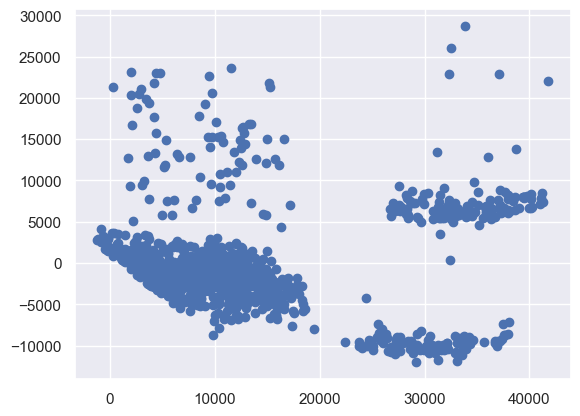

MSE: 38193265.08
RMSE: 6180.07
R2: 0.75




In [14]:
# validate (residuals / MSE / coefficient of determination)
predictions = model.predict(X_train)

# check residuals
residuals = y_train - predictions

residual_mean = residuals.mean()
print(f"Residuals mean: {residual_mean:.2f}")
print("\n")

plt.scatter(predictions, residuals)
plt.show()

# compute metrics
metrics_mse = mean_squared_error(y_train, predictions)
metrics_rmse = mean_squared_error(y_train, predictions, squared=False) # make it same dimension as the outcome
metrics_r2 = r2_score(y_train, predictions)

# print metrics
print(f"MSE: {metrics_mse:.2f}")
print(f"RMSE: {metrics_rmse:.2f}")
print(f"R2: {metrics_r2:.2f}")
print("\n")

We determine potential violations to the linearity assumption. Although the residuals are centered around zero, we observe that errors variance depends on the target variable region. In particular, the model has larger errors for higher medical costs (> 20k USD).

We may experiment with outcome transformations and more complex terms in the regression model later to mitigate this effect.

Despite this limitation, the model performs reasonably well, representing 75% of the variance in the outcome variable. It can be useful to identify core medical costs predictors and to provide recommendations for the hospitals management.

As a last step, we check how the model performs for unseen data using the test dataset.

In [15]:
# use on test data
y_pred_test = model.predict(X_test)

# compute metrics
metrics_mse = mean_squared_error(y_test, y_pred_test)
metrics_rmse = mean_squared_error(y_test, y_pred_test, squared=False) # make it same dimension as the outcome

# print metrics
print(f"MSE: {metrics_mse:.2f}")
print(f"RMSE: {metrics_rmse:.2f}")
print("\n")

MSE: 32598545.28
RMSE: 5709.51




The MSE value for test data is comparable (and smaller) than for the training data. The model does not seem to be overfit and performs well for unseen data.

---
# Findings and recommendations

We find that a simple linear regression performs reasonably well for predicting medical costs based on patient data. It struggles in the region of higher costs (> 20k USD), where the prediction errors are larger than for lower costs. Nevertheless, the model coefficients can be directly intepreted to provide recommendations for the hospitals.

We determine that being a `smoker`, patients `bmi` and `age` are good predictors for medical costs. These observations are consistent between the model building and EDA. We find that, when only a change in the particular feature is considered and the remaining features are constant:
* being a smoker increases medical costs by almost 24k USD
* each unit increase in the `bmi` index increases medical costs by 318.8 USD
* each additional year in patient age increases medical costs by 271.3 USD.

Being a smoker is the dominant predictor for medical costs.

**Recommendations**

Limitations and perspectives:
* The dataset is unbalanced (skewed medical costs distribution) and affected by outliers. We may experiment with output transformations (like log-transform) to mitigate this problem.
* We observe potential linearity violations for the current model. We may experiment with more complex models or, again, with the outcome transformations.
* It seems that changes in the number of children, region, and sex are not strongly related to the medical costs. However, we may inspect further and use them in more complex models.